In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('merged_movies_credits.csv')

In [ ]:
df.shape

(4796, 16)

In [ ]:
df.head()

,movie_id,title_x,budget,revenue,runtime,release_date,genres,original_language,popularity,vote_average,vote_count,status,production_companies,title_y,top_cast,director
0,19995,Avatar,237000000,2923706026,162,2009-12-15,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",en,24.6495,7.589,32216,Released,"['Dune Entertainment', 'Lightstorm Entertainme...",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,285,Pirates of the Caribbean: At World's End,300000000,961691209,169,2007-05-19,"['Adventure', 'Fantasy', 'Action']",en,14.9196,7.259,14687,Released,"['Jerry Bruckheimer Films', 'Second Mate Produ...",Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,206647,Spectre,245000000,880707597,148,2015-10-26,"['Action', 'Adventure', 'Thriller']",en,6.4422,6.558,10702,Released,"['Metro-Goldwyn-Mayer', 'Columbia Pictures', '...",Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,49026,The Dark Knight Rises,250000000,1081041287,165,2012-07-17,"['Action', 'Crime', 'Drama', 'Thriller']",en,13.0256,7.785,23192,Released,"['Syncopy', 'Legendary Pictures', 'DC Entertai...",The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,49529,John Carter,250000000,284100000,132,2012-03-07,"['Action', 'Adventure', 'Science Fiction']",en,6.1147,6.333,5723,Released,['Walt Disney Pictures'],John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

director    30
dtype: int64


In [ ]:
df.columns.tolist()

['movie_id',
 'title_x',
 'budget',
 'revenue',
 'runtime',
 'release_date',
 'genres',
 'original_language',
 'popularity',
 'vote_average',
 'vote_count',
 'status',
 'production_companies',
 'title_y',
 'top_cast',
 'director']

In [ ]:
missing_directors = df[df['director'].isnull()]
print(missing_directors[['title_x', 'release_date']])

                                                title_x release_date
3656                                          Flying By   2009-01-01
3665                                    Running Forever   2015-10-27
3724                                                Paa   2009-12-04
3970                                 Boynton Beach Club   2005-08-05
4061                                          Sharkskin   2015-01-01
4098    The Book of Mormon Movie, Volume 1: The Journey   2003-09-12
4111                             Hum To Mohabbat Karega   2000-05-26
4116                                     Roadside Romeo   2008-10-24
4240                              Me You and Five Bucks   2015-07-07
4298                          Down & Out With The Dolls   2002-04-26
4307                                          Crowsnest   2012-09-07
4315                                 Sex with Strangers   2002-02-22
4367                              Dream with the Fishes   1997-11-21
4394                              

In [ ]:
df['director'] = df['director'].fillna('Unknown')

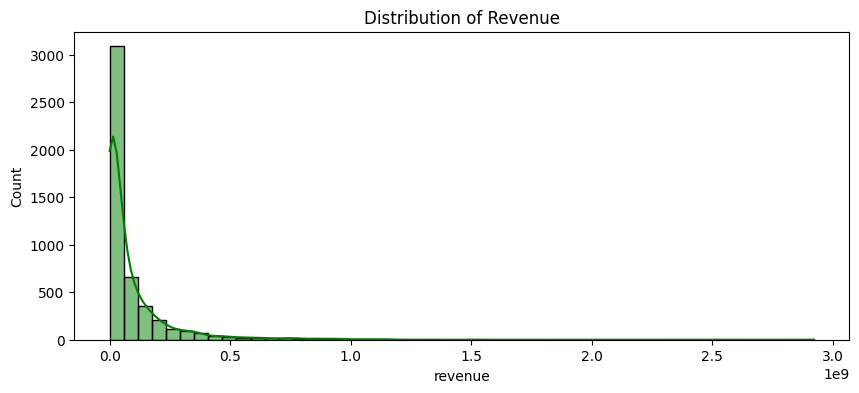

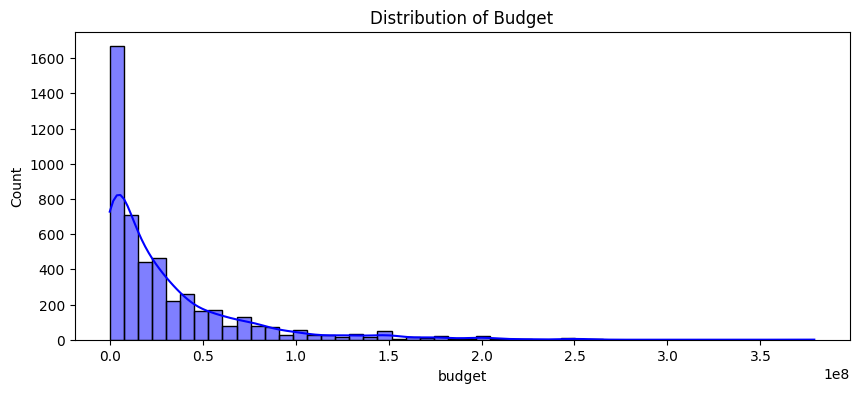

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['revenue'], bins=50, kde=True, color='green')
plt.title('Distribution of Revenue')

plt.figure(figsize=(10,4))
sns.histplot(df['budget'], bins=50, kde=True, color='blue')
plt.title('Distribution of Budget')

plt.show()

We can see a right-skewed distribution between in both revenue and budget, implying that most movies have very low budgets and a small number of blockbuster films dominate the upper range (e.g. budgets > $100M)

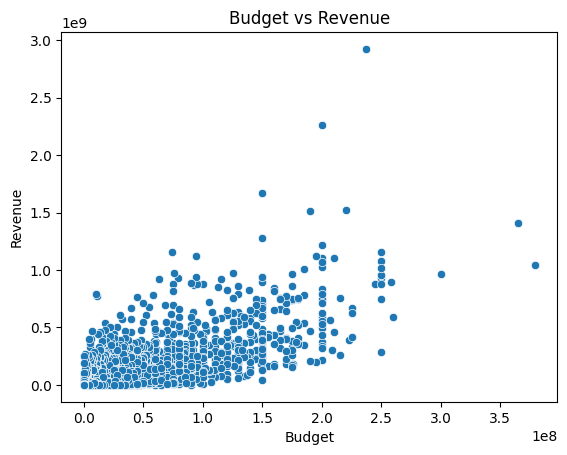

In [ ]:
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

There's a positive relationship betwene budget and revenue but still significant variance as some movies with high budgets still flop and lower-budget ones do well.

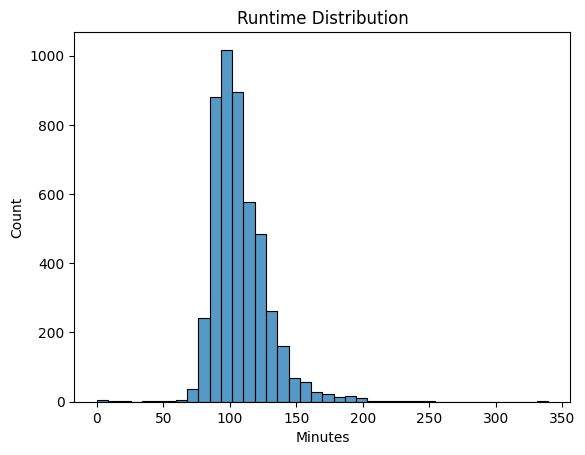

In [ ]:
sns.histplot(df['runtime'].dropna(), bins=40)
plt.title('Runtime Distribution')
plt.xlabel('Minutes')
plt.show()

<Axes: title={'center': 'Average Revenue by Language'}, xlabel='original_language'>

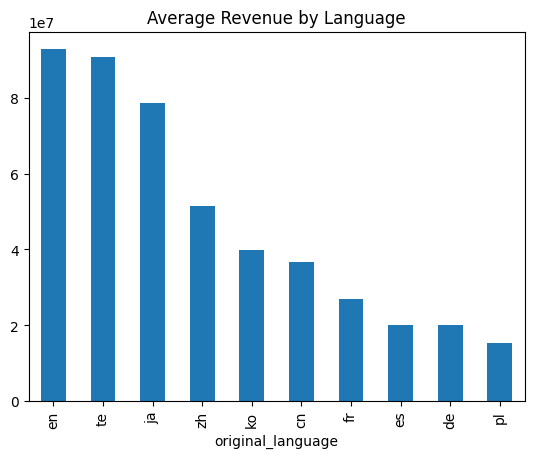

In [ ]:
lang_revenue = df.groupby('original_language')['revenue'].mean().sort_values(ascending=False).head(10)
lang_revenue.plot(kind='bar', title='Average Revenue by Language')

In [ ]:
df.columns.tolist()

['movie_id',
 'title_x',
 'budget',
 'revenue',
 'runtime',
 'release_date',
 'genres',
 'original_language',
 'popularity',
 'vote_average',
 'vote_count',
 'status',
 'production_companies',
 'title_y',
 'top_cast',
 'director']

In [ ]:
df['log_budget'] = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])

df['release_date']  = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

In [ ]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

df['genre_list'] = df['genres'].apply(lambda x: [g.strip() for g in ast.literal_eval(x)] if pd.notnull(x) else [])

mlb = MultiLabelBinarizer()
genre_df = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_)

df = pd.concat([df, genre_df], axis=1)
df.drop(['genres', 'genre_list'], axis=1, inplace=True)

In [ ]:
top_langs = df['original_language'].value_counts().nlargest(8).index
df['original_language'] = df['original_language'].apply(lambda x: x if x in top_langs else 'other')
df = pd.get_dummies(df, columns=['original_language'])

df['main_company'] = df['production_companies'].apply(lambda x: ast.literal_eval(x)[0] if pd.notnull(x) and len(ast.literal_eval(x)) > 0 else 'unknown')
top_companies = df['main_company'].value_counts().nlargest(10).index
df['main_company'] = df['main_company'].apply(lambda x: x if x in top_companies else 'other')
df = pd.get_dummies(df, columns=['main_company'])

top_directors = df['director'].value_counts().nlargest(10).index
df['director'] = df['director'].apply(lambda x: x if x in top_directors else 'other')
df = pd.get_dummies(df, columns=['director'])

In [ ]:
df['top_cast'] = df['top_cast'].apply(ast.literal_eval)
cast_df = df.explode('top_cast')

top_actors = cast_df['top_cast'].value_counts().nlargest(15).index

for actor in top_actors:
    df[f'actor_{actor.replace(" ", "_")}'] = df['top_cast'].apply(lambda x: 1 if actor in x else 0)

df.drop(columns=['top_cast'], inplace=True)

In [ ]:
df['budget_to_popularity'] = df['log_budget'] / (df['popularity'] + 1)
df['vote_ratio'] = df['vote_average'] / (df['vote_count'] + 1)
df['is_summer_release'] = df['release_month'].isin([5, 6, 7, 8]).astype(int)
df['is_holiday_release'] = df['release_month'].isin([11,12]).astype(int)
df['runtime_bucket'] = pd.cut(
    df['runtime'],
    bins=[0, 90, 110, 130, 150, float('inf')],
    labels=[0, 1, 2, 3, 4]
).cat.add_categories([-1]).fillna(-1).astype(int)

In [ ]:
df.drop(columns=['budget', 'revenue', 'status', 'release_date', 'production_companies', 'homepage', 'tagline', 'overview'], errors='ignore', inplace=True)


In [ ]:
df.columns

Index(['movie_id', 'title_x', 'runtime', 'popularity', 'vote_average',
       'vote_count', 'title_y', 'log_budget', 'log_revenue', 'release_year',
       'release_month', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'original_language_cn',
       'original_language_de', 'original_language_en', 'original_language_es',
       'original_language_fr', 'original_language_hi', 'original_language_ja',
       'original_language_other', 'original_language_zh',
       'main_company_20th Century Fox', 'main_company_Columbia Pictures',
       'main_company_Metro-Goldwyn-Mayer', 'main_company_New Line Cinema',
       'main_company_Paramount Pictures', 'main_company_Touchstone Pictures',
       'main_company_Universal Pictures', 'main_company_Walt Disney Pictures',
       'main_company_Warner Bros. Pictures', 'ma

In [ ]:
df[['is_summer_release', 'is_holiday_release', 'runtime_bucket']].head()

,is_summer_release,is_holiday_release,runtime_bucket
0,0,1,4
1,1,0,4
2,0,0,3
3,1,0,4
4,0,0,3


In [ ]:
df.to_csv('final_dataset.csv', index=False)